In [4]:
!pip install tensorflow

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
import os

In [15]:
dataset_dir = r"C:\Users\venka\OneDrive\Documents\Aicte-4weeks\Garbage_Classification"

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [17]:
# Check number of batches
print(f"Training batches: {len(train_ds)}")
print(f"Validation batches: {len(val_ds)}")

# Display class names
print("Class names:", train_ds.class_names)

Training batches: 64
Validation batches: 16
Class names: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


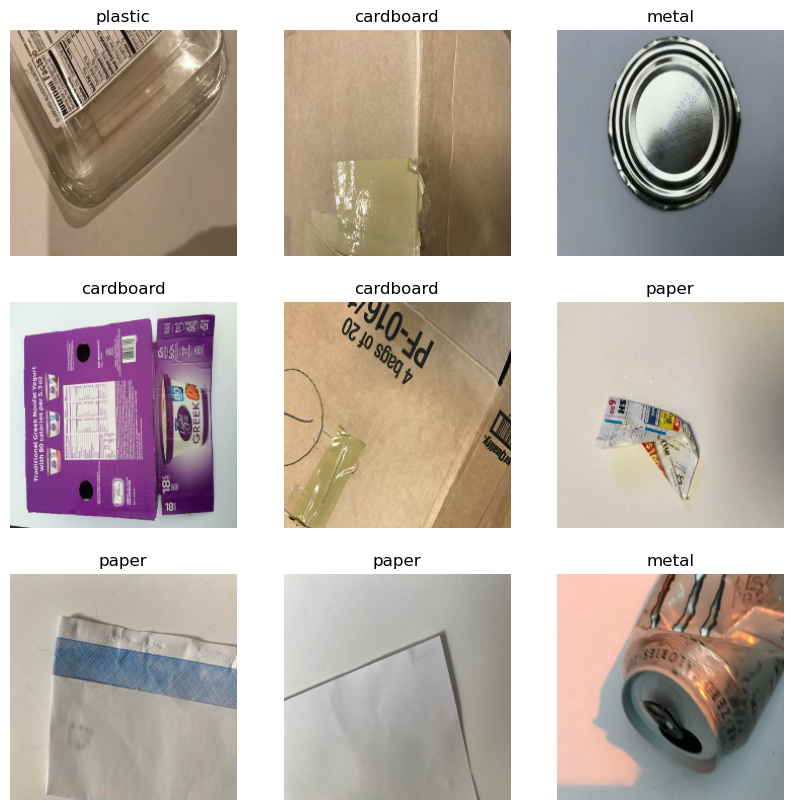

In [18]:
# Visualize sample images from training data
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")
plt.show()

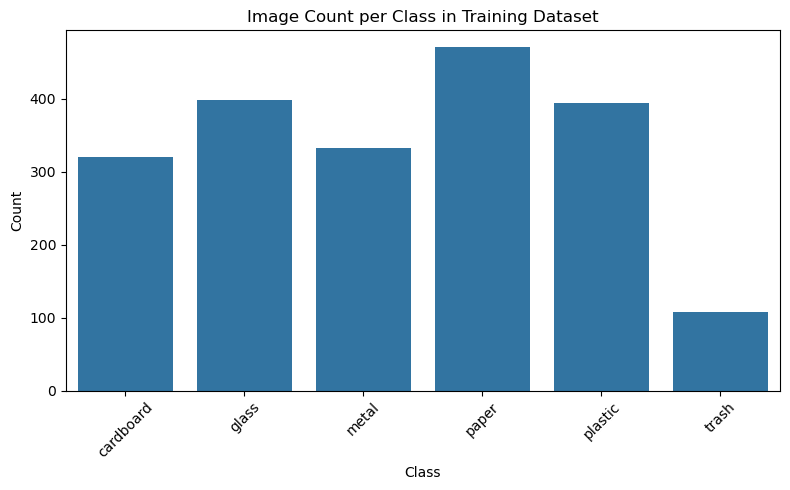

In [21]:
# Function to count and plot class distribution
def count_distribution(dataset, class_names):
    count_dict = dict.fromkeys(class_names, 0)
    for images, labels in dataset:
        for label in labels.numpy():
            count_dict[class_names[label]] += 1
    return count_dict

distribution = count_distribution(train_ds, train_ds.class_names)
# Plot class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=list(distribution.keys()), y=list(distribution.values()))
plt.xticks(rotation=45)
plt.title("Image Count per Class in Training Dataset")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()